In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/CarPrice_Assignment.csv
/kaggle/input/car-data/Data Dictionary - carprices.xlsx


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
car=pd.read_csv('../input/car-data/CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Information  about the dataset 

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Describe 
It is used to get the insight of the dataset like mean, median, std etc.

In [10]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Shape of the dataset 

In [11]:
car.shape

(205, 26)

In [12]:
car.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
car['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

# EDA analysis of car dataset

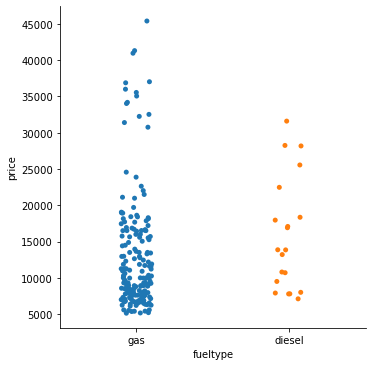

In [14]:
sns.catplot(x='fueltype',y='price', data=car).add_legend()
plt.show()

<AxesSubplot:xlabel='fueltype', ylabel='price'>

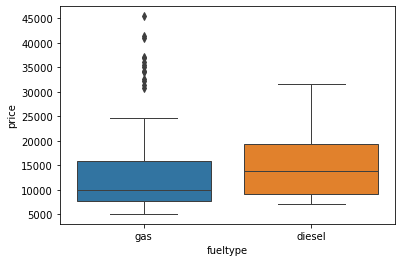

In [15]:
sns.boxplot(x='fueltype',y='price', data=car,linewidth=1)

In [16]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
car['carlength']

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

<AxesSubplot:xlabel='fueltype', ylabel='carlength'>

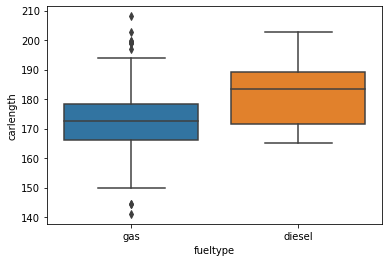

In [18]:
sns.boxplot(x='fueltype',y='carlength', data=car)

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data cleaning and preparation

In [20]:
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 720x720 with 0 Axes>

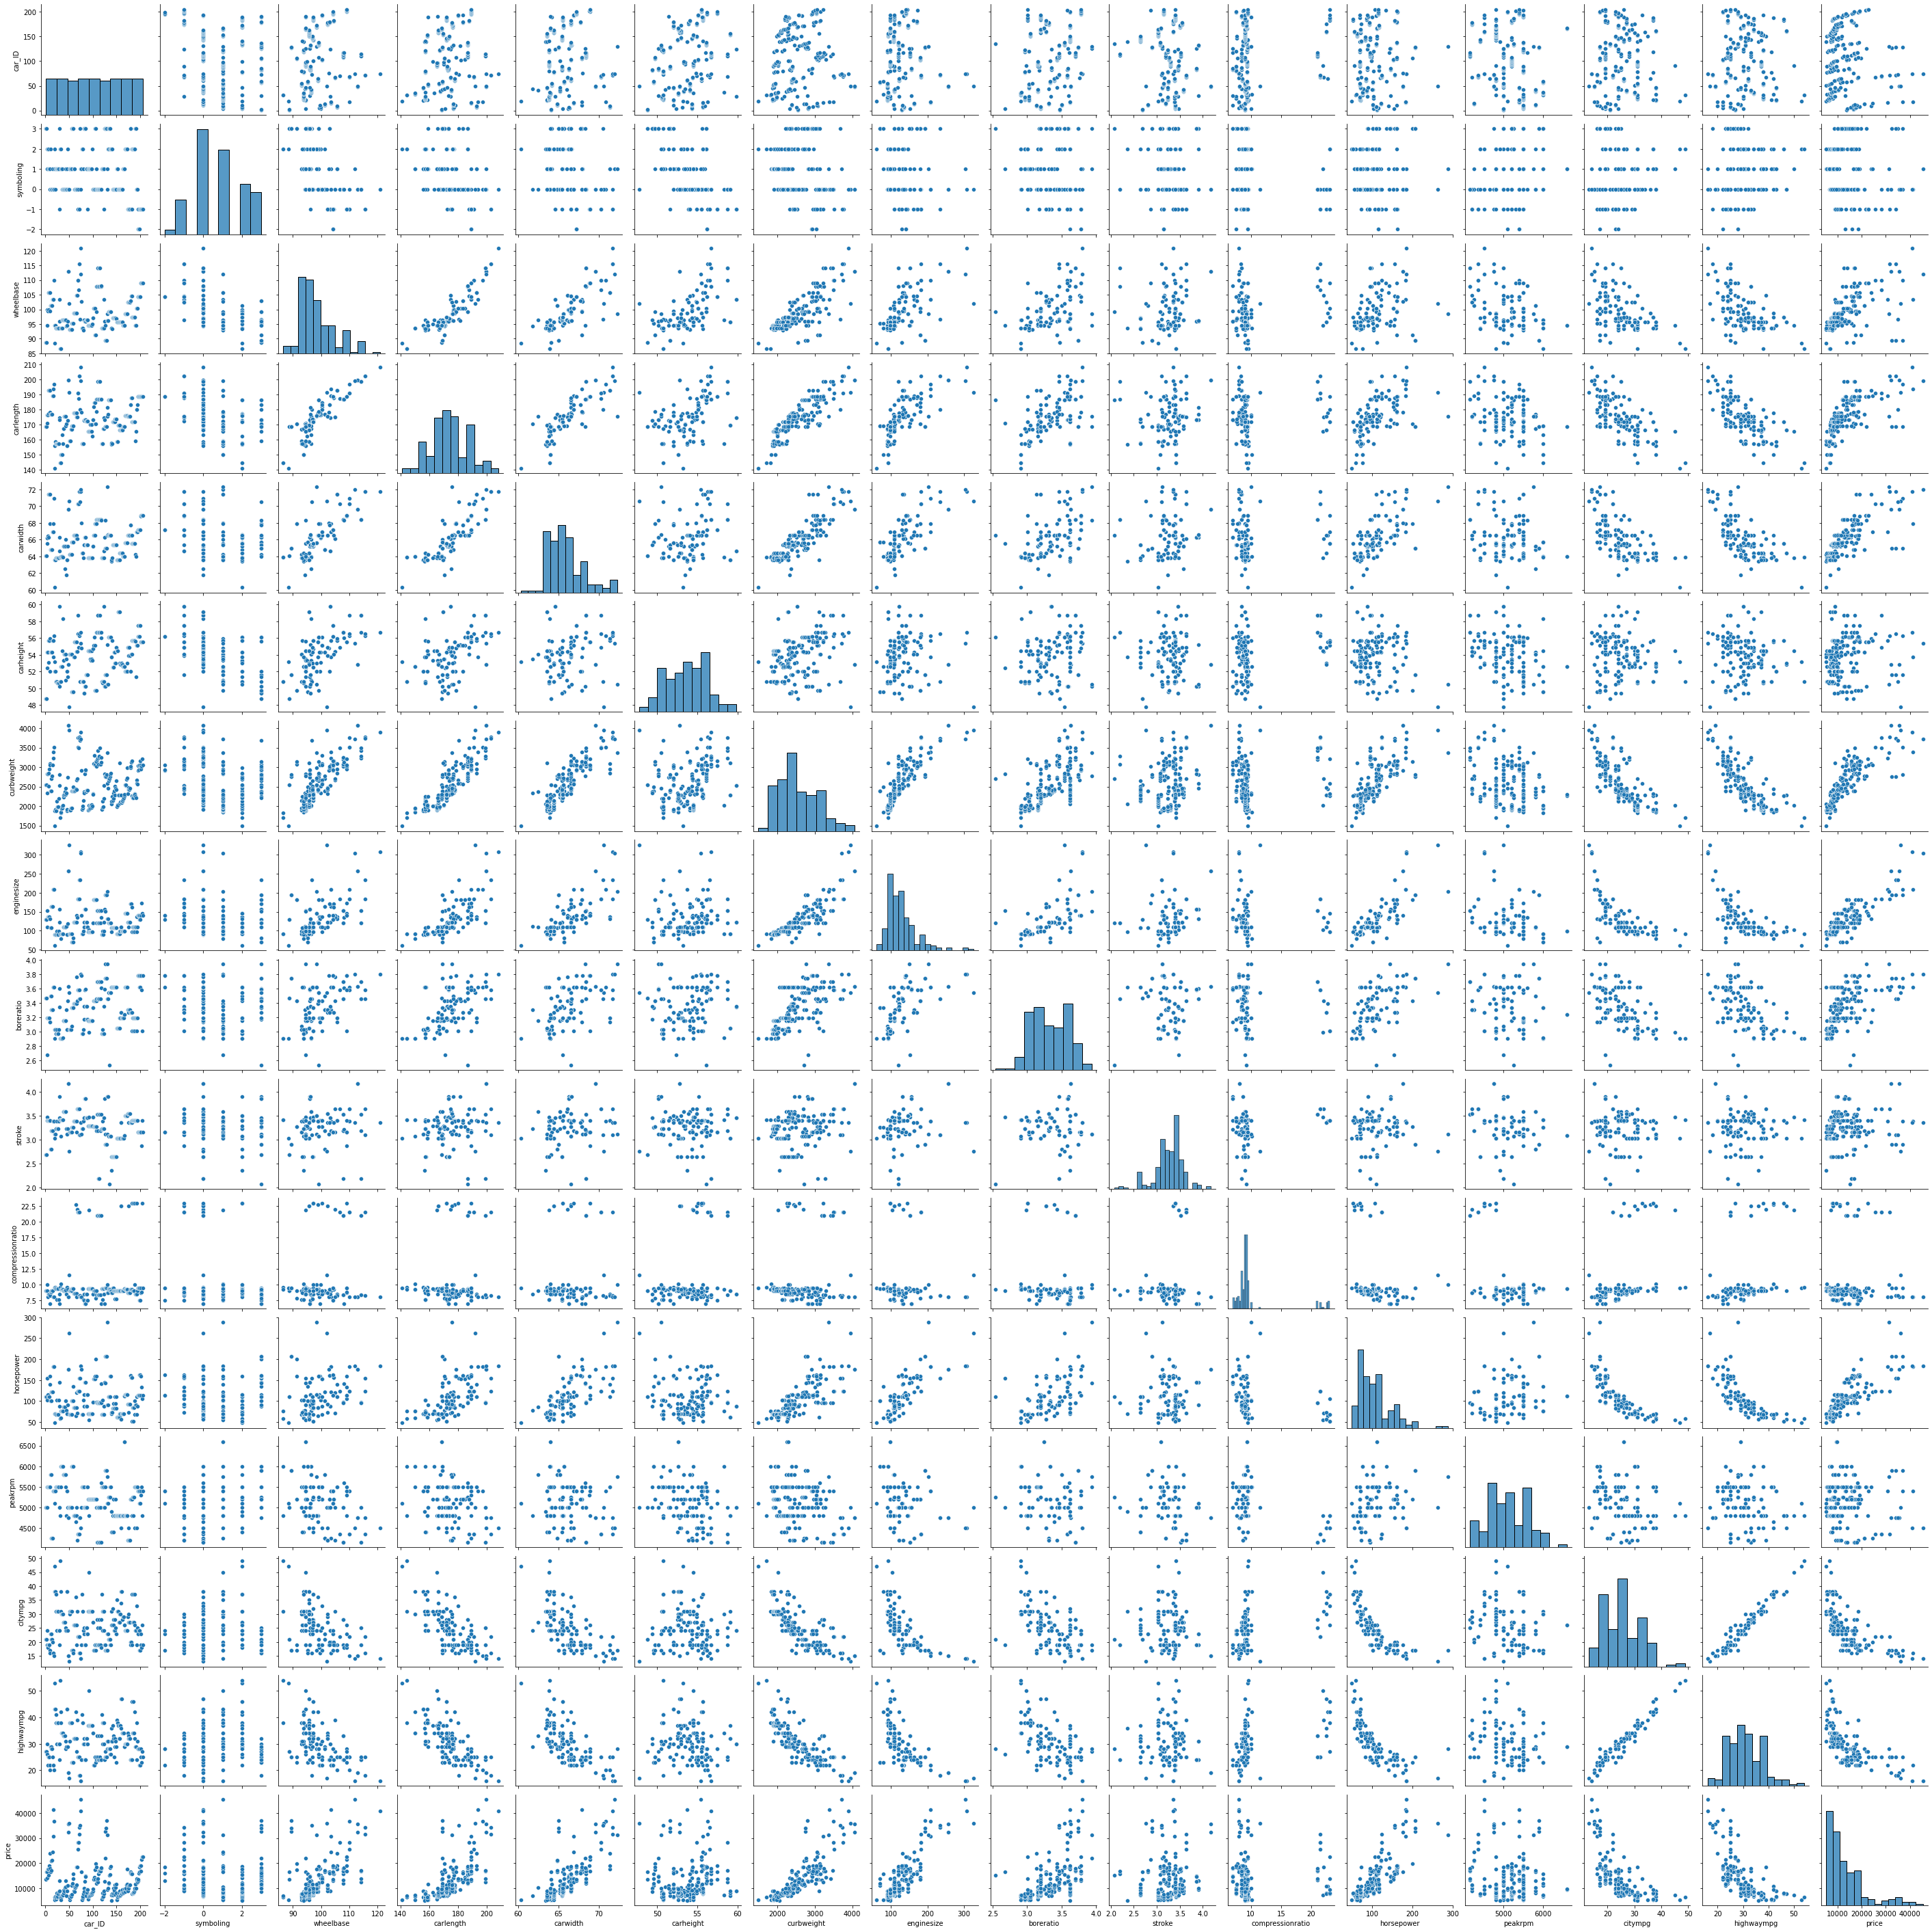

In [21]:
plt.figure(figsize=(10,10))
sns.pairplot(car)

In [22]:
car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing invalid values
There seems to be some spelling error in the CompanyName column.

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw


In [23]:
car.CompanyName=car.CompanyName.str.lower()

def replace_name(a,b):
    car.CompanyName.replace(a,b, inplace=True)
    
replace_name('maxda','mazada')
replace_name('porcshe','porcshce')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw', 'volkswagen')

In [24]:
car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazada', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

# Checking for duplicates


In [25]:
car.loc[car.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


**No Duplicate Found**

In [26]:
car.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# useful insight of car price

In [27]:
car.price.describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

# inference :
* The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
* There is a significant difference between the mean and the median of the price distribution.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#  Visualising Categorical Data

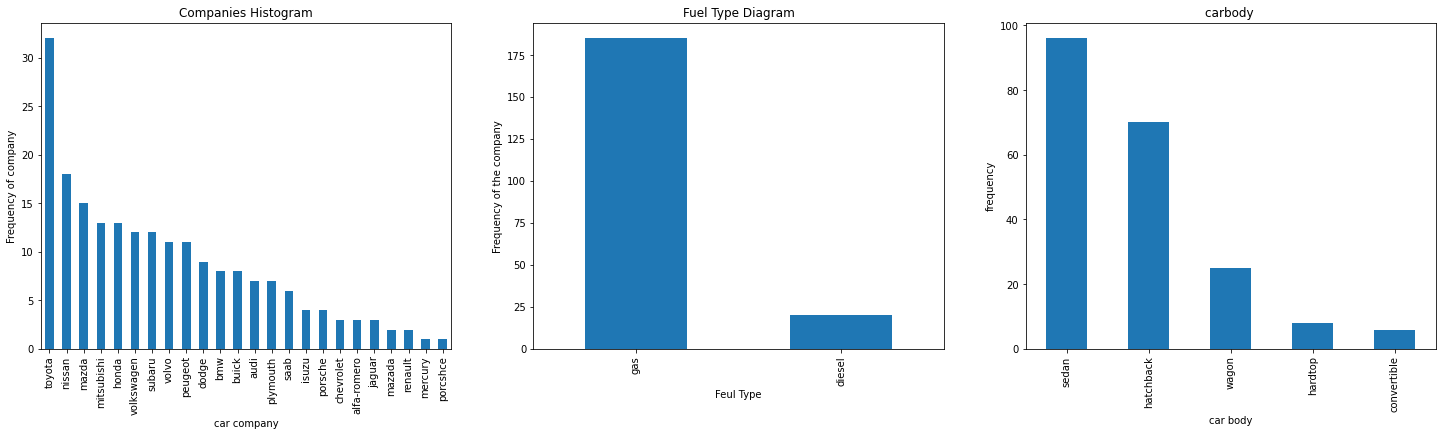

In [28]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=car.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel='car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1=car.fueltype.value_counts().plot(kind='bar')
plt.title("Fuel Type Diagram")
plt1.set(xlabel="Feul Type",ylabel="Frequency of the company")

plt.subplot(1,3,3)
plt1=car.carbody.value_counts().plot(kind='bar')
plt.title("carbody ")
plt1.set(xlabel="car body", ylabel="frequency")

plt.show()


# inference :
* Toyota seemed to be favored car company.
* Number of gas fueled cars are more than diesel.
* sedan is the top car type prefered

In [29]:
car.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

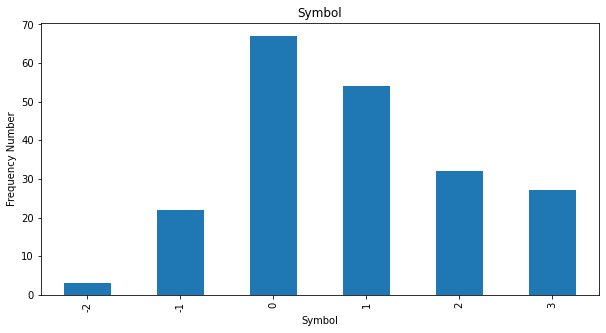

In [30]:
plt.figure(figsize=(10,5))
car.symboling.value_counts().plot(kind='bar')
plt.title("Symbol")
plt.xlabel("Symbol")
plt.ylabel("Frequency Number")
plt.show()

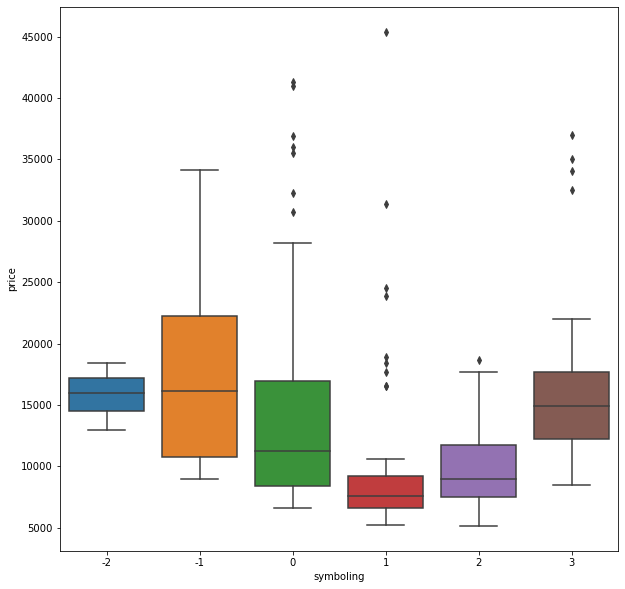

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(x='symboling', y='price', data=car)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


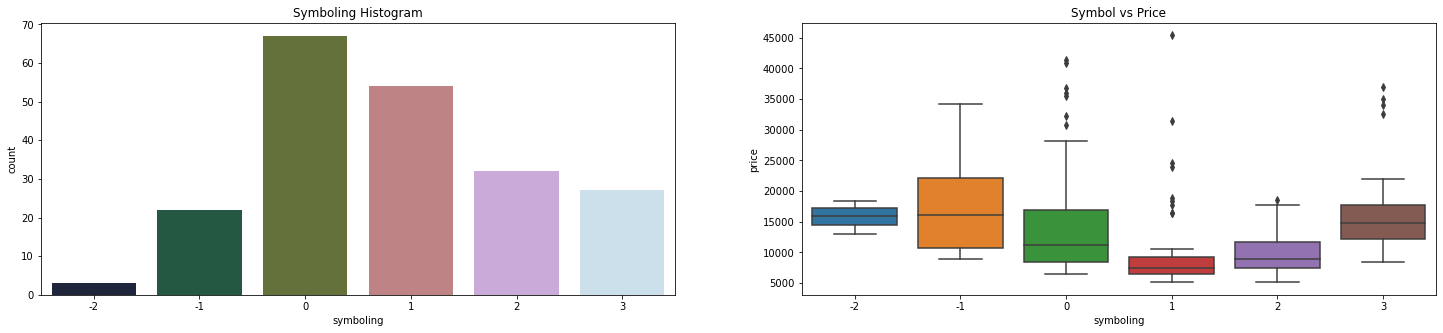

In [32]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(car.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title("Symbol vs Price")
sns.boxplot(x='symboling', y='price', data=car)

plt.show()

In [33]:
car.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


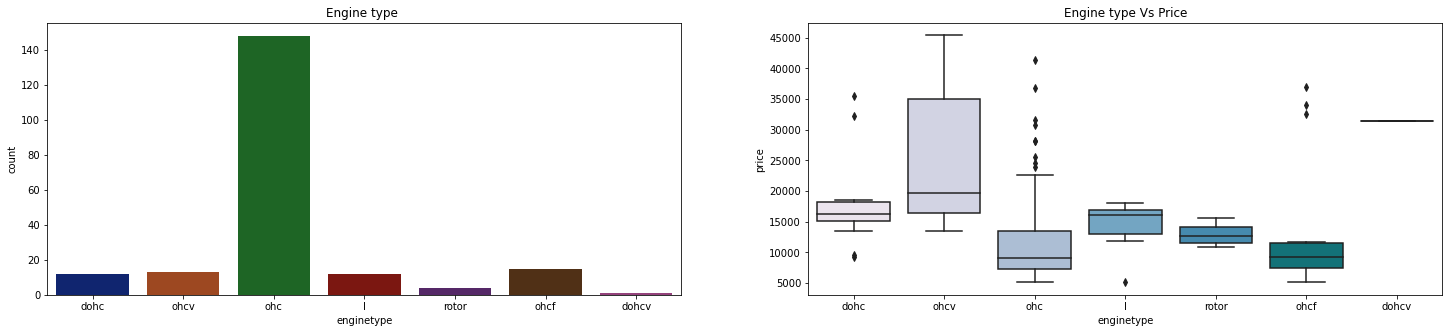

In [34]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title("Engine type ")
sns.countplot(car.enginetype, palette=("dark"))

plt.subplot(1,2,2)
plt.title("Engine type Vs Price")
sns.boxplot(x="enginetype", y='price', data=car, palette=("PuBuGn"))
plt.show()

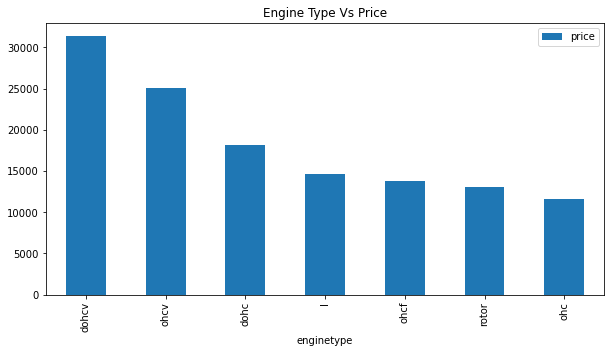

In [35]:
df=pd.DataFrame(car.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,5))
plt.title("Engine Type Vs Price")
plt.show()

# Inference :
* ohc Engine type seems to be most favored type.
* ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

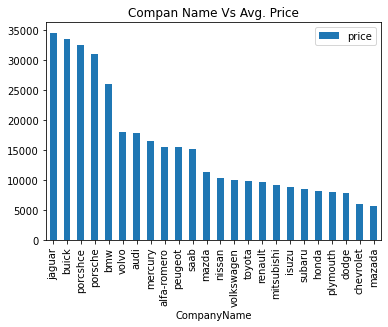

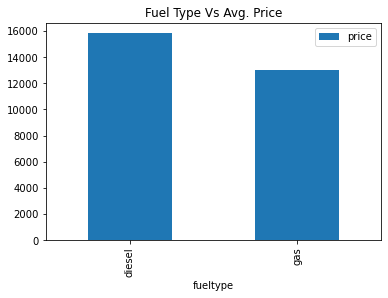

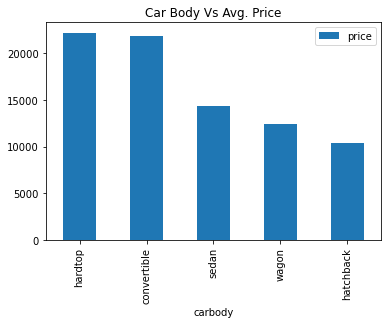

In [36]:
plt.figure(figsize=(10,10))

df=pd.DataFrame(car.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Compan Name Vs Avg. Price")
plt.show

df=pd.DataFrame(car.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fuel Type Vs Avg. Price")
plt.show

df=pd.DataFrame(car.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car Body Vs Avg. Price")
plt.show


# Inference :
* Jaguar and Buick seem to have highest average price.
* diesel has higher average price than gas.
* hardtop and convertible have higher average price.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


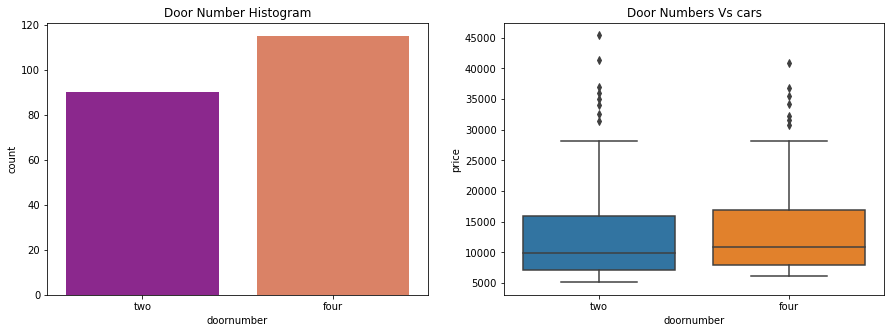

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title("Door Numbers Vs cars")
sns.boxplot(x="doornumber", y='price', data=car)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


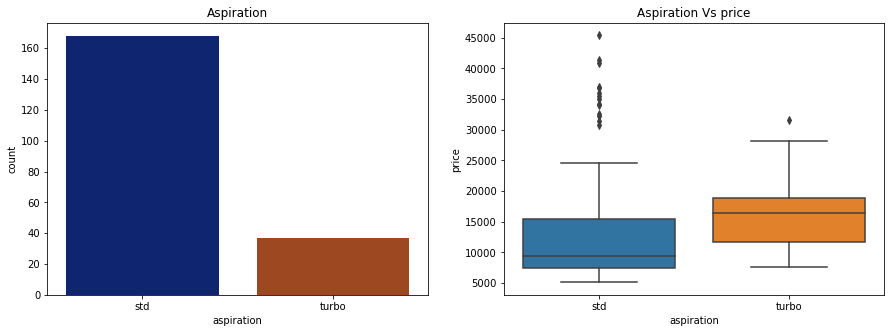

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Aspiration")
sns.countplot(car.aspiration, palette=("dark"))

plt.subplot(1,2,2)
plt.title("Aspiration Vs price")
sns.boxplot(x="aspiration", y="price", data=car)

plt.show()

# Inference :
* Doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
* It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

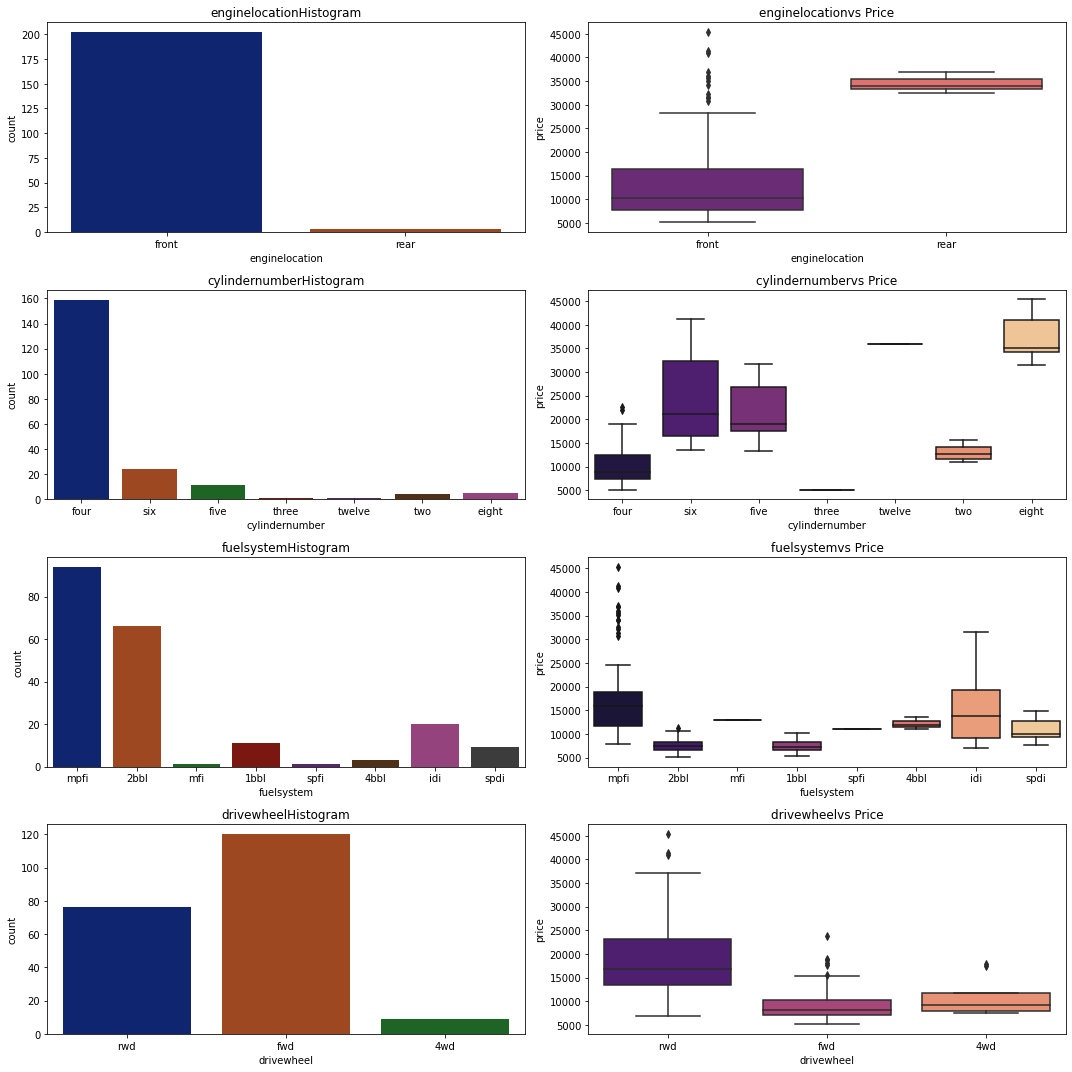

In [39]:
def plot_count(x, fig):
    plt.subplot(4,2,fig)
    plt.title(x+'Histogram')
    sns.countplot(car[x], palette=("dark"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+'vs Price')
    sns.boxplot(x=car[x],y=car.price, palette=("magma"))
    
plt.figure(figsize=(15,15))

plot_count("enginelocation",1)
plot_count("cylindernumber",3)
plot_count("fuelsystem",5)
plot_count("drivewheel",7)

plt.tight_layout()
plt.show()
    

# Inference :
* Very few datapoints for enginelocation categories to make an inference.
* Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
* mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
* A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

# Visualising numerical data

In [40]:
car.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

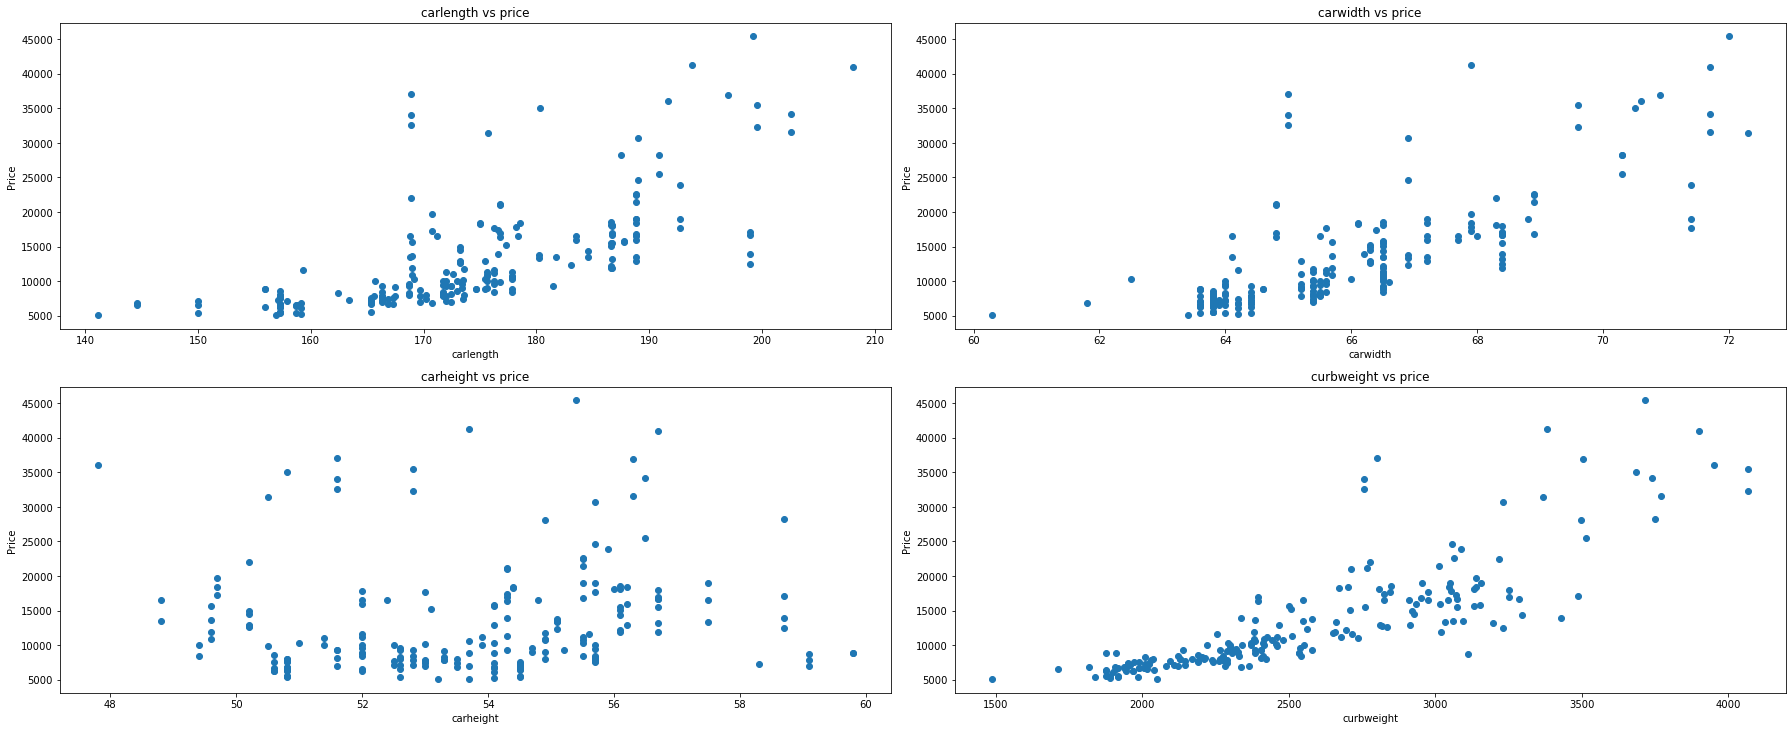

In [41]:
def scatter(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(car[x], car['price'])
    plt.title(x+' vs price')
    plt.ylabel("Price")
    plt.xlabel(x)
    
plt.figure(figsize=(25,25))

scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

plt.tight_layout()

# Inference :
* carwidth, carlength and curbweight seems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.

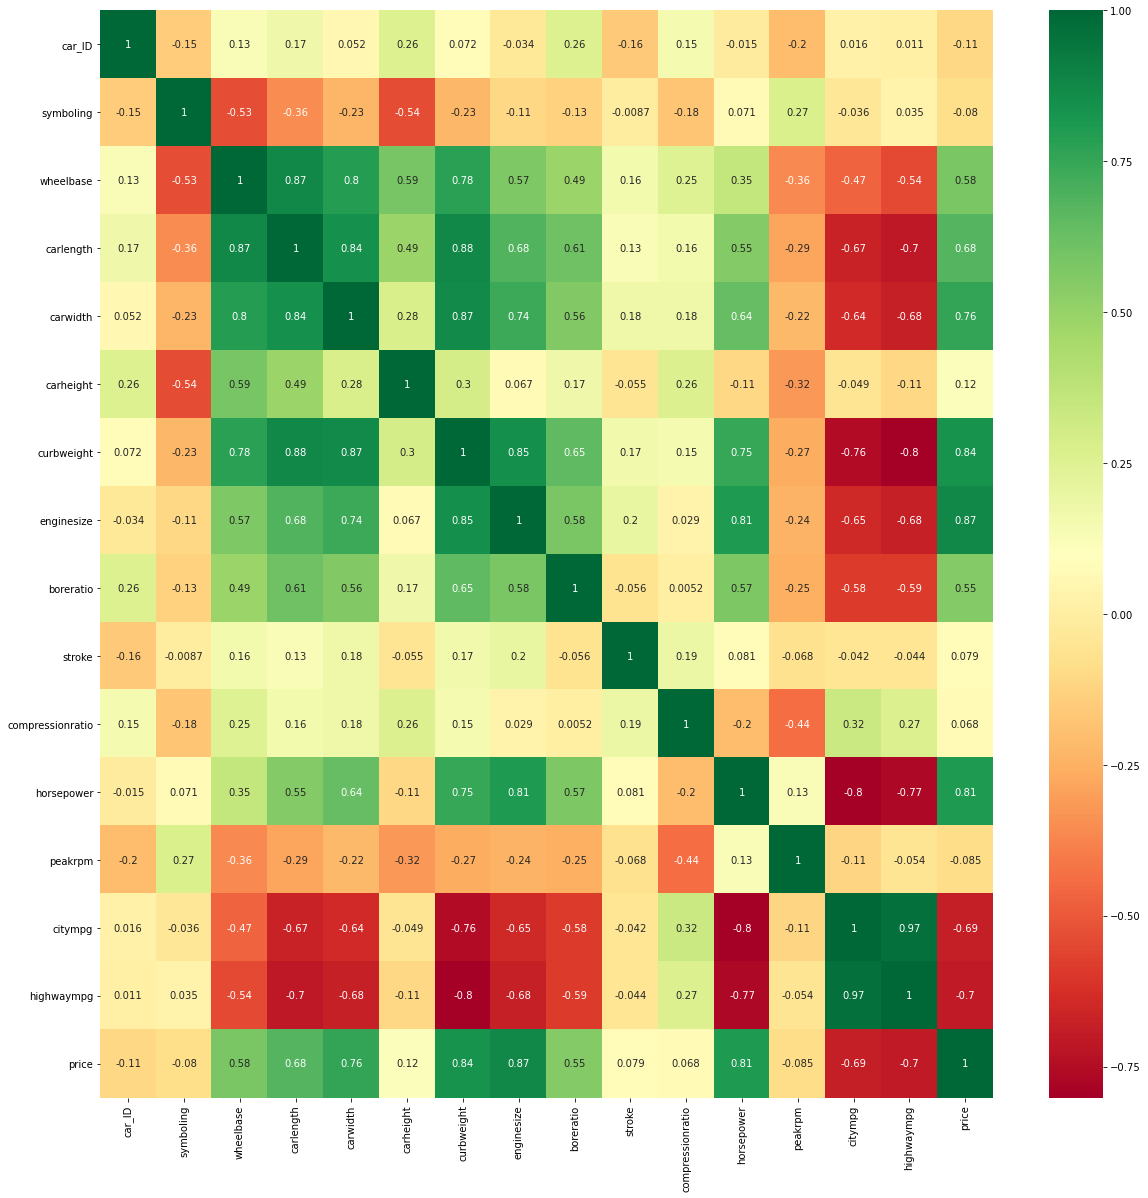

In [42]:
corrmat=car.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(car[top_corr_feature].corr(), annot=True,cmap="RdYlGn")

# Conclusion
* Here is the EDA of car price prediction
* Prediction will be done next day 
* The Linear Regression will be used to predict the price of the car
* Seaborn is uded to get the good visual represenatation of the data
